In [7]:
import numpy as np
from skimage.transform import resize
from skimage.io import imsave
import pickle
from scipy.linalg import eig
from scipy.linalg import sqrtm
from numpy.linalg import inv
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 5 a)

In [8]:
x_train = pickle.load(open( 'x_train.p', 'rb' ), encoding='latin1')
x_train = np.asarray(x_train)
x_train = x_train/255.0*2.0-1.0
x_train = x_train.reshape(x_train.shape[0],-1)
y_train = pickle.load(open( 'y_train.p', 'rb' ), encoding='latin1')
y_train = np.asarray(y_train)
y_train = y_train/255.0*2.0-1.0
y_train = y_train.reshape(y_train.shape[0],-1)

In [9]:
x_mean = np.sum(x_train,0)/np.size(x_train,0)
y_mean = np.sum(y_train,0)/np.size(y_train,0)
x_var = np.dot((x_train - x_mean).T,x_train - x_mean)/(np.size(x_train,0)-1)

y_var = np.dot((y_train - y_mean).T,y_train - y_mean)/(np.size(y_train,0)-1)
xy_var = np.dot((y_train - y_mean).T,x_train - x_mean)/(np.size(y_train,0)-1)
#y_train - y_mean
#np.size(x_train,0)

#plt.imshow(y_train[0]/255.0)
#plt.show()

## 5 b)

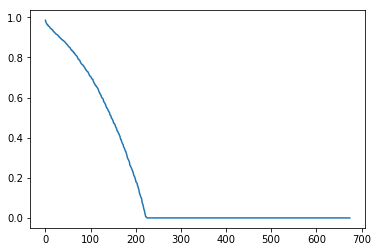

In [11]:
lamb = 0.00001
[U_x,D_x,V_x] = svd(x_var + lamb*np.eye(np.size(x_var,0)))
[U_y,D_y,V_y] = svd(y_var + lamb*np.eye(np.size(y_var,0)))

Ax = np.dot(np.dot(U_x,np.linalg.inv(sqrtm(np.diag(D_x)))),V_x)
Ay = np.dot(np.dot(U_y,np.linalg.inv(sqrtm(np.diag(D_y)))),V_y)
[U,D,V] = svd(np.dot(np.dot(Ax,xy_var.T),Ay))
plt.plot(range(np.size(D)),D)
plt.show()

## 5 c)

In [12]:
def plot_image(vector,string):
    vector = ((vector+ 1.0)/2.0)*255.0
    vector = np.reshape(vector, (15,15,3))
    p = vector.astype("uint8")
    p = resize(p, (100, 100), mode='reflect')
    #p = cv2.resize(p,(100,100))
    count = 0
    imsave(string, p)

In [13]:
plot_image( x_mean + U[:,0],'eigen_face.png')

/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## 5 d)

In [14]:
x_test = pickle.load(open( 'x_test.p', 'rb' ), encoding='latin1')
x_test = np.asarray(x_test)
x_test = x_test/255.0*2.0-1.0
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = pickle.load(open( 'y_test.p', 'rb' ), encoding='latin1')
y_test = np.asarray(y_test)
y_test = y_test/255.0*2.0-1.0
y_test = y_test.reshape(y_test.shape[0],-1)
kRange = list([0,50,100,150,200,250,300,350,400,450,500,650])
error = []
for k in kRange:
    B = np.dot(x_train,U[:,:k + 1])
    B = np.dot(np.dot(np.linalg.inv(np.dot(B.T,B) + lamb*np.eye(np.size(B,1))),B.T),y_train)
    error.append(np.linalg.norm(np.dot(np.dot(x_test,U[:,0:k + 1]),B) - y_test)**2)

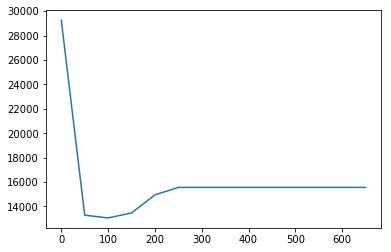

In [15]:
plt.plot(kRange,error)
plt.show()

## 5 e)

In [16]:
B = np.dot(x_train,U[:,:100 + 1])
B = np.dot(np.dot(np.linalg.inv(np.dot(B.T,B) + lamb*np.eye(np.size(B,1))),B.T),y_train)
preImg = np.dot(np.dot(x_test,U[:,0:100 + 1]),B)

plot_image(x_test[0,:],'test_0_bin.png')
plot_image(y_test[0,:],'test_0_gro.png')
plot_image(preImg[0,:],'test_0_pre.png')


plot_image(x_test[1,:],'test_1_bin.png')
plot_image(y_test[1,:],'test_1_gro.png')
plot_image(preImg[1,:],'test_1_pre.png')


plot_image(x_test[2,:],'test_2_bin.png')
plot_image(y_test[2,:],'test_2_gro.png')
plot_image(preImg[2,:],'test_2_pre.png')


plot_image(x_test[3,:],'test_3_bin.png')
plot_image(y_test[3,:],'test_3_gro.png')
plot_image(preImg[3,:],'test_3_pre.png')



/Users/zhaoqingyang/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


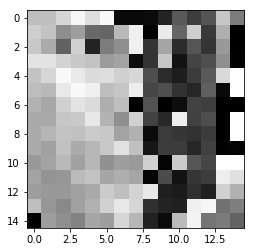

In [33]:
image = np.zeros((15,15,3),dtype =np.float)
image = y_test[1].reshape(15,15,3)
plt.imshow(image)
plt.show()